The data consist of today's return, today's close, and today's volume.

In [1]:
import numpy as np
X = np.load('zipped_zrxeth.npy')
Vols = X[:-1,-1].copy()

X

array([[ 1.14730835e-03,  1.65795000e-03,  2.62475175e+00],
       [ 5.23538104e-03,  1.66663000e-03,  3.28326110e-01],
       [-4.83010626e-03,  1.65858000e-03,  2.57114150e-01],
       ...,
       [-2.95242766e-03,  2.03298000e-03,  1.48840980e-01],
       [ 2.97592696e-03,  2.03903000e-03,  1.27231755e+00],
       [ 3.24173749e-03,  2.04564000e-03,  8.49572000e+00]])

In [2]:
X[:,-1] = X[:,-1]/1000.0
X[:,-1]=np.log(X[:,-1]+1e-6)/1000
X

array([[ 0.00114731,  0.00165795, -0.00594239],
       [ 0.00523538,  0.00166663, -0.00801846],
       [-0.00483011,  0.00165858, -0.00826211],
       ...,
       [-0.00295243,  0.00203298, -0.00880594],
       [ 0.00297593,  0.00203903, -0.00666613],
       [ 0.00324174,  0.00204564, -0.00476808]])

In [3]:
np.std(X[:,-1]),np.std(X[:,0])

(0.003167335779072404, 0.002549075748767973)

Features include past 5 days return sequence, past 5 days price range, and past 5 days sum volume(log scaled).

In [4]:
XX=[]
w = 5
for i in range(int(len(X)/w)):
    #x = list(X[i*w:w*i+w,0])
    x=[sum(X[i*w:i*w+w,0])*1.0]
    x+=[(max(X[i*w:i*w+w,1])-min(X[i*w:i*w+w,1]))]
    x+=[sum(X[i*w:i*w+w,-1])*1.0]
    XX.append(x)
XX

[[0.00440616195961518, 8.68000000000006e-06, -0.04368957361405087],
 [1.2270693517863552e-05, 4.8299999999999385e-06, -0.0465904611716156],
 [1.7562980968370383e-05, 3.919999999999922e-06, -0.050599144498768414],
 [0.002004313833283038, 8.460000000000065e-06, -0.040591411936954085],
 [0.0020100201002010345, 0.0, -0.05370199803635713],
 [-6.609234491072155e-07, 3.850000000000121e-06, -0.05876650392481183],
 [0.002287952903486025, 7.669999999999986e-06, -0.04560577173844352],
 [-0.002263554677819156, 4.29000000000011e-06, -0.06120207154008408],
 [0.002264172590406167, 4.239999999999973e-06, -0.06008389438686266],
 [-0.004234240437242579, 2.8100000000000087e-06, -0.05403778653229521],
 [0.009529557002186264, 1.1939999999999997e-05, -0.040088217186270717],
 [-0.00691044673387319, 3.54000000000001e-06, -0.05431720774375629],
 [0.0030131561981797607, 6.1999999999998254e-06, -0.04998939609263579],
 [-0.002373800542133499, 4.690000000000119e-06, -0.049946916744753905],
 [0.0, 0.0, -0.069077552

In [5]:
Mins = np.load('Mins_zrxeth.npy')
Mins = Mins[:-1]

In [6]:
Close = np.load('close_zrxeth.npy')
Close=Close[:-1]

In [98]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from hmmlearn import hmm
warnings.filterwarnings('ignore')
np.random.seed(10)
model = hmm.GaussianHMM(n_components=10, covariance_type="full", min_covar=0.0,verbose=True,n_iter=100)
model.fit(XX)  
model.monitor_  

         1       47027.6752             +nan
         2       30647.7498      -16379.9253


ConvergenceMonitor(history=[47027.6751731665, 30647.74983032215], iter=2,
          n_iter=100, tol=0.01, verbose=True)

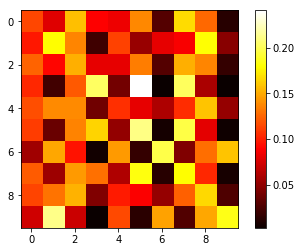

In [99]:
from matplotlib import pyplot as plt
from matplotlib.colors import PowerNorm

%matplotlib inline
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')
plt.colorbar()

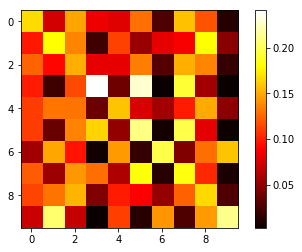

In [100]:

for s in range(model.n_components):
    p = max(0.1,np.max(model.transmat_[s]))
    if model.transmat_[s][s]>=p:
        pass
    else:
        denom = sum(model.transmat_[s])-model.transmat_[s][s]
        model.transmat_[s]/=denom
        model.transmat_[s]*=1-p
        model.transmat_[s][s] = p
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')
plt.colorbar()

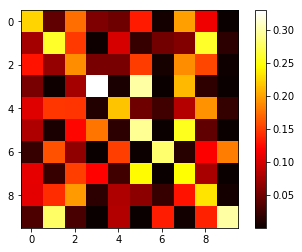

In [101]:
for s in range(model.n_components):
    model.transmat_[s] = model.transmat_[s]**2
    model.transmat_[s]/=sum(model.transmat_[s])
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')
plt.colorbar()

In [102]:
ZZ = model.predict(XX)

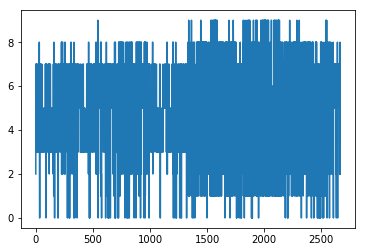

In [103]:
plt.plot(ZZ)

In [104]:
len(XX),len(ZZ)

(2666, 2666)

In [105]:
len(Mins),len(Close)

(13330, 13330)

In [106]:
Z=[]
for i in ZZ:
    Z+=[i]*w
print len(Z)
Z = np.array(Z)

13330


In [107]:

print("Transition matrix")
print(model.transmat_)
print()
from matplotlib import cm
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()



Transition matrix
[[2.24461306e-01 4.34285130e-02 1.74581015e-01 5.66007361e-02
  4.92182895e-02 1.33229449e-01 5.80144895e-03 1.98068644e-01
  1.13336047e-01 1.27455206e-03]
 [7.58677246e-02 2.59459595e-01 1.48365381e-01 3.71618064e-03
  1.00445677e-01 2.26370489e-02 5.25449112e-02 6.04234673e-02
  2.58709011e-01 1.78310036e-02]
 [1.29309607e-01 6.86159506e-02 1.90119852e-01 5.44046233e-02
  5.41701150e-02 1.49123405e-01 6.85966060e-03 1.89419399e-01
  1.55345187e-01 2.63220123e-03]
 [5.50681374e-02 2.68965803e-03 7.62356115e-02 3.29026974e-01
  8.36522472e-03 2.98833755e-01 3.86678282e-05 2.11451243e-01
  1.82287000e-02 6.20285739e-05]
 [1.05162564e-01 1.47077889e-01 1.45281975e-01 1.18966332e-02
  2.16578731e-01 4.98009384e-02 2.76392148e-02 8.38888701e-02
  1.91944678e-01 2.07285057e-02]
 [8.10532427e-02 8.73294220e-03 1.22672571e-01 1.78591566e-01
  1.73389963e-02 2.93135326e-01 2.93985435e-04 2.55438910e-01
  4.25814692e-02 1.60991447e-04]
 [2.30573937e-02 1.59688890e-01 6.624870

In [108]:
Ret = X[:,0]
log_Ret = np.log(Ret+1.0)
def score_plot(Mins,Close,Vols,Ret,Z,n_comp,fee=0.005):
    end = []
    Seg = []
    plt.figure()
    for i in range(n_comp):
        cur = [0]
        seg = 0
        flag= False
        for j in range(len(Z)):
            if i == Z[j]:
                if not flag:
                    seg+=1
                    flag = True
                cur.append(cur[-1]+Ret[j])
            else:
                if flag:
                    flag=False
                cur.append(cur[-1])
        end.append(cur[-1])
        Seg.append(seg)
        plt.plot(Mins,cur[1:],label='Z='+str(i)+' '+str(cur[-1]))
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Log Return')
    plt.figure()
    fig, ax1 = plt.subplots(figsize=(20,6))
    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('eth-btc', color=color)
    ax1.plot(Mins, Close, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
    ax2.plot(Mins, Vols, color=color)
    ax2.set_ylim(0,1000)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout() 
    score_up = 0
    score_down = 0
    score_none = 0
    tseg = sum(Seg)
    #fee=0.005
    for i in range(n_comp):

        if end[i]<0.5*max(end) and end[i]>0.5*min(end):
            score_none+=end[i]
            ax1.plot(Mins[Z==i],Close[Z==i],'bo',markersize=1)
        elif end[i]>=0.5*max(end):
            score_up+=end[i]-fee*Seg[i]
            ax1.plot(Mins[Z==i],Close[Z==i],'ro',markersize=3)
        else:
            score_down+=abs(end[i])-fee*Seg[i]
            ax1.plot(Mins[Z==i],Close[Z==i],'go',markersize=3)
    score = score_up+score_down-abs(score_none)
    print 'Score:'+str(score)
    return score,Seg

Score:0.4956777807279249


(0.4956777807279249, [79, 126, 190, 68, 54, 275, 70, 304, 186, 51])

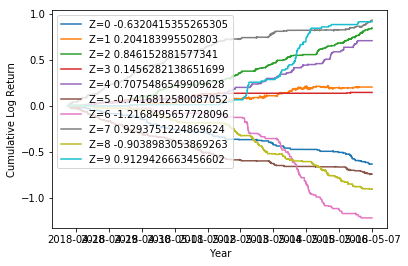

<Figure size 432x288 with 0 Axes>

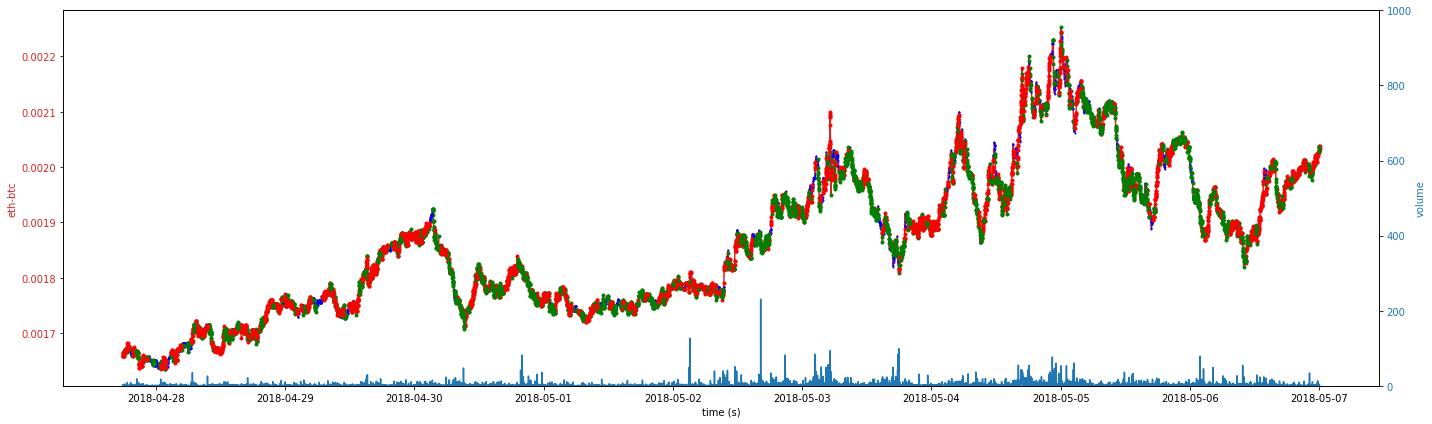

In [109]:
score_plot(Mins,Close,Vols,Ret,Z,model.n_components,fee=0.005)

### Results:
#### p threshold = 0.9:  Score = 1.119
####            = 0.7:  Score = 1.537
####            = 0.5:  Score = 2.016
####            = 0.4:  Score = 2.467
####            = 0.2:  Score = 1.880
####            = 0.1:  Score = 0.496